In [33]:
# Bibliotecas utilizadas durante essa parte do relatório
import os
from scipy.io import loadmat
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

In [34]:
# Coletando os dados experimentais do formato .mat
data = loadmat("data/trabalho2dados.mat")
# Resposta a onda quadrada +/- 2Volts
t2v = np.array(data["t2v"]) # t2v:  tempo (s)
u2v = np.array(data["u2v"]) # u2v:  entrada Va (v)
y2v = np.array(data["y2v"]) # y2v:  saida  wm  (rad/s)
# Resposta a onda quadrada +/- 4Volts
t4v = np.array(data["t4v"]) # t4v:  tempo (s)
u4v = np.array(data["u4v"]) # u4v:  entrada Va (v)
y4v = np.array(data["y4v"]) # y4v:  saida  wm  (rad/s)
# Resposta a onda quadrada +/- 10Volts
t10v = np.array(data["t10v"]) # t10v:  tempo (s)
u10v = np.array(data["u10v"]) # u10v:  entrada Va (v)
y10v = np.array(data["y10v"]) # y10v:  saida  wm  (rad/s)
# Resposta a Senoide de  5Volts 
tsin5v = np.array(data["tsin5v"]) # tsin5v:  tempo (s)
usin5v = np.array(data["usin5v"]) # usin5v:  entrada Va (v)
ysin5v = np.array(data["ysin5v"]) # ysin5v:  saida  wm  (rad/s)

In [35]:
# Definindo as constantes do sistema
Ra = 10.6
La = 0.82 * 10**(-3)
Jeq = 22.07136 * 10**(-6)
Km = 0.0502
Ke = 0.0502

In [36]:
# Resposta a onda quadrada +/- 2Volts
t2 = np.linspace(0, len(t2v)/100, len(t2v)) # t2:  tempo (s)
u2 = 1.98 * np.sign(np.sin(2 * np.pi * (1/2) * (t2-0.475))) # u2:  entrada Va (V)
# Resposta a onda quadrada +/- 4Volts
t4 = np.linspace(0, len(t4v)/100, len(t4v)) # t4:  tempo (s)
u4 = 3.96 * np.sign(np.sin(2 * np.pi * (1/2) * (t4-0.655))) # u4:  entrada Va (V)
# Resposta a onda quadrada +/- 10Volts
t10 = np.linspace(0, len(t10v)/100, len(t10v)) # t10:  tempo (s)
u10 = 4.95 * np.sign(np.sin(2 * np.pi * (1/2) * (t10-0.915))) + 4.95 # u10:  entrada Va (V)
# Resposta a Senoide de +/- 5Volts 
tsin5 = np.linspace(0, len(tsin5v)/100, len(tsin5v)) # tsin5:  tempo (s)
usin5 = 4.965666 * np.sin(tsin5*np.pi + 3*np.pi/2 - 0.15) # usin5:  entrada Va (V)

In [37]:
# Definindo as matrizes A, B, C e D do sistema
A = np.array([[0, 1], [-Ke*Km/Jeq/La, -Ra/La]])
B = np.array([[0], [1]])
C = np.array([[Km/Jeq/La, 0]])
D = np.array([[0]])
# Criando um objeto StateSpace para representar seu sistema.
sys = ctrl.StateSpace(A, B, C, D)
# Resposta do Sistema G(s).
t2, y2 = ctrl.forced_response(sys, T=t2, U=u2)
t4, y4 = ctrl.forced_response(sys, T=t4, U=u4)
t10, y10 = ctrl.forced_response(sys, T=t10, U=u10)
tsin5, ysin5 = ctrl.forced_response(sys, T=tsin5, U=usin5)

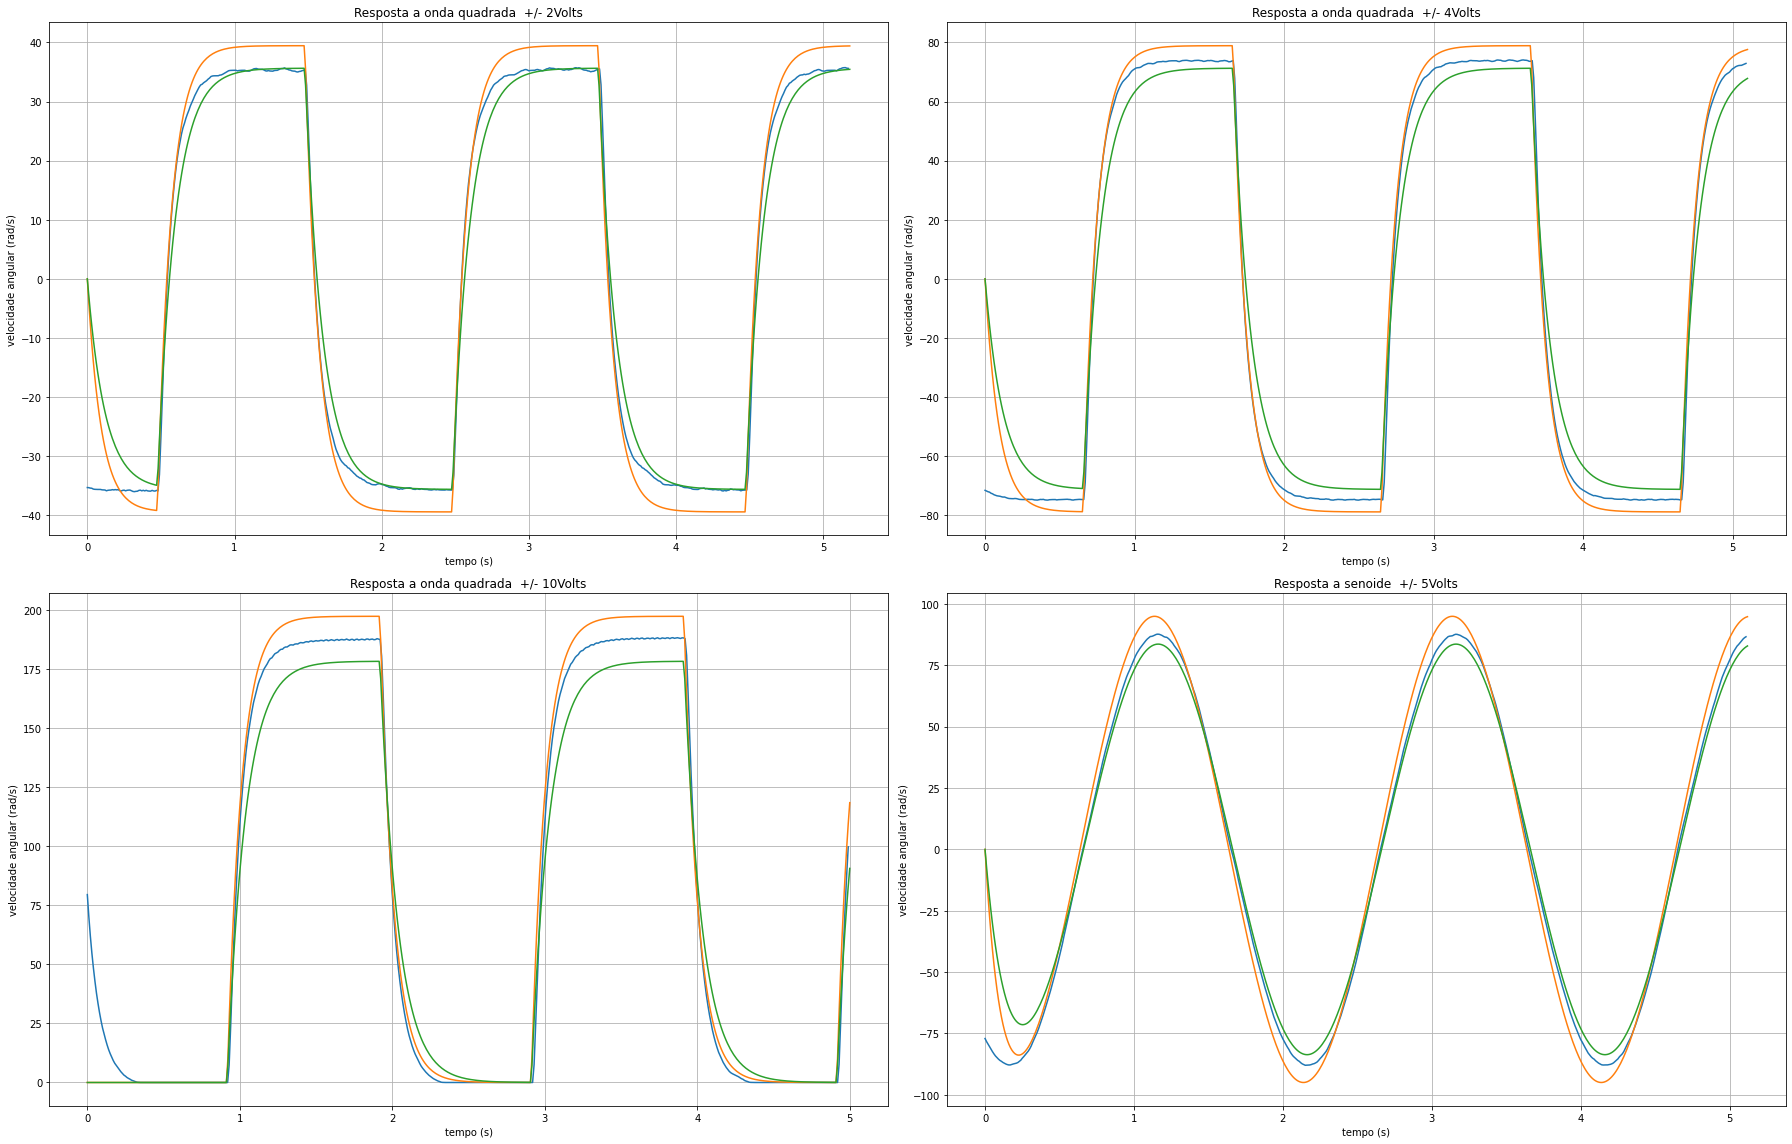

In [38]:
# Definir a funcao de transferencia do sistema G_Hat(s)
num = [18]  # o K foi escolhido pegando o menor dos que se ajustaram as quatro respostas
den = [0.12, 1]  # o tau foi escolhido pegando o maior dos que se ajustaram as quatro respostas
sys_hat = ctrl.TransferFunction(num, den)  # criar o objeto que representa o sistema
# Criar a figura e os quatro subplots com tamanho ajustável
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25, 16))
# Plotar o gráfico no subplot 1
ax1.plot(t2v, y2v)
ax1.plot(t2, y2)
t_hat_2, y_hat_2 = ctrl.forced_response(sys_hat,T=t2,U=u2)
ax1.plot(t_hat_2, y_hat_2)
ax1.set_title('Resposta a onda quadrada  +/- 2Volts')
ax1.set_xlabel('tempo (s)')
ax1.set_ylabel('velocidade angular (rad/s)')
ax1.grid(True)
# Plotar o gráfico no subplot 2
ax2.plot(t4v, y4v)
ax2.plot(t4, y4)
t_hat_4, y_hat_4 = ctrl.forced_response(sys_hat,T=t4,U=u4)
ax2.plot(t_hat_4, y_hat_4)
ax2.set_title('Resposta a onda quadrada  +/- 4Volts')
ax2.set_xlabel('tempo (s)')
ax2.set_ylabel('velocidade angular (rad/s)')
ax2.grid(True)
# Plotar o gráfico no subplot 3
ax3.plot(t10v, y10v)
ax3.plot(t10, y10)
t_hat_10, y_hat_10 = ctrl.forced_response(sys_hat,T=t10,U=u10)
ax3.plot(t_hat_10, y_hat_10)
ax3.set_title('Resposta a onda quadrada  +/- 10Volts')
ax3.set_xlabel('tempo (s)')
ax3.set_ylabel('velocidade angular (rad/s)')
ax3.grid(True)
# Plotar o gráfico no subplot 4
ax4.plot(tsin5v, ysin5v)
ax4.plot(tsin5, ysin5)
t_hat_sin5, y_hat_sin5 = ctrl.forced_response(sys_hat,T=tsin5,U=usin5)
ax4.plot(t_hat_sin5, y_hat_sin5)
ax4.set_title('Resposta a senoide  +/- 5Volts')
ax4.set_xlabel('tempo (s)')
ax4.set_ylabel('velocidade angular (rad/s)')
ax4.grid(True)
# Ajustar o espaçamento entre os subplots
plt.tight_layout()
# Exibir o gráfico
plt.show()